In [ ]:
"""
SARTHAK KAPILA
Github :- https://github.com/sarthakkapila/
Emai :- sarthakkapila1@gmail.com


Task: Build a model based on convolutional-recurrent architectures for classifying Style, Artist, 
Genre, and other attributes. General and Specific.


BSD License.
"""

In [165]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import models, transforms, datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.optim as optim

from torchvision.models import resnet18

import torchvision.models as models

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

In [169]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
import pandas as pd

In [ ]:
"""
Note :- so the provided version of the dataset was very very big about 63 GB,
I wasn't really sure if that version would work properly on my system
So, I decided to use a more tonend down version of the same Wiki Art dataset,

Specifications of dataset :-

wiki art - v2 
==============================
This dataset was exported via roboflow.ai on March 9, 2022 at 5:30 PM GMT

It includes 15274 images.
27 are annotated in folder format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 416x416 (Stretch)

The following augmentation was applied to create 3 versions of each source image:
* 50% probability of horizontal flip
* Random brigthness adjustment of between -25 and +25 percent


Apologies if any discrepancies were caused by using a smaller version of the dataset

Thank you.


"""

In [150]:
# Changes to names of the jpegs.
# To be ran multiple times for different test,train,valid folders


# All folders
names = [
    "Abstract_Expressionism", "Analytical_Cubism", "Art_Nouveau_Modern", "Baroque",
    "Color_Field_Painting", "Contemporary_Realism", "Cubism", "Early_Renaissance", "Expressionism",
    "Fauvism", "High_Renaissance", "Impressionism", "Mannerism_Late_Renaissance", "Minimalism",
    "Naive_Art_Primitivism", "New_Realism", "Northern_Renaissance", "Pointillism", "Pop_Art",
    "Post_Impressionism", "Realism", "Rococo", "Romanticism", "Symbolism", "Synthetic_Cubism", "Ukiyo_e"
]
                                                           
#                                                         Change folder names
base_folder_path = '/Users/sarthakkapila/Desktop/wiki art.v2i.folder/valid'

def rename_files(base_folder_path, names):
    for name in names:
        folder_path = os.path.join(base_folder_path, name)
        for filename in os.listdir(folder_path):
            if ".rf." in filename:
                new_filename = filename.split("_jpg.")[0] + "." + filename.split(".")[-1]
                os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
                print(f"Renamed {filename} to {new_filename} in folder {names}")

rename_files(base_folder_path, names)

In [164]:
# Adding /Users/sarthakkapila/Desktop/wiki art.v2i.folder infront of all paths in the csv


                        # ran multiple times for different folders
base_path = '/Users/sarthakkapila/Desktop/wiki art.v2i.folder/valid'

with open('/Users/sarthakkapila/Desktop/wikiart_csv/artist_val.csv', 'r') as file:
    lines = file.readlines()

new_lines = []
for line in lines:
    
    path, label = line.strip().split(',')
    image_path = os.path.join(base_path, path)
    
    if os.path.exists(image_path):
        new_path = os.path.join(base_path, path)
        new_lines.append(new_path + ',' + label + '\n')
        
    else:
        print(f"Image not found at {image_path}, skipping...")
        
with open('/Users/sarthakkapila/Desktop/wikiart_csv/artist_val_modified_final.csv', 'w') as file:
    file.writelines(new_lines)

In [152]:
# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        image = Image.open(img_name)
        label = int(self.data.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((416, 416)), 
    transforms.ToTensor(),          
#     transforms.Normalize(mean=[0.2], std=[0.2]),  # Normalizations
])

# Load dataset
artist_train_dataset = CustomDataset('/Users/sarthakkapila/Desktop/wikiart_csv/artist_train_modified_final.csv', transform=transform)
style_train_dataset = CustomDataset('/Users/sarthakkapila/Desktop/wikiart_csv/style_train_modified_final.csv', transform=transform)
genre_train_dataset = CustomDataset('/Users/sarthakkapila/Desktop/wikiart_csv/genre_train_modified_final.csv', transform=transform)

artist_val_dataset = CustomDataset('/Users/sarthakkapila/Desktop/wikiart_csv/artist_val_modified_final.csv', transform=transform)
style_val_dataset = CustomDataset('/Users/sarthakkapila/Desktop/wikiart_csv/style_val_modified_final.csv', transform=transform)
genre_val_dataset = CustomDataset('/Users/sarthakkapila/Desktop/wikiart_csv/genre_val_modified_final.csv', transform=transform)


# Define DataLoader
artist_train_dataloader = DataLoader(artist_train_dataset, batch_size=32, shuffle=True)
style_train_dataloader = DataLoader(style_train_dataset, batch_size=32, shuffle=True)
genre_train_dataloader = DataLoader(genre_train_dataset, batch_size=32, shuffle=True)


artist_val_dataloader = DataLoader(artist_val_dataset, batch_size=32, shuffle=True)
style_val_dataloader = DataLoader(style_val_dataset, batch_size=32, shuffle=True)
genre_val_dataloader = DataLoader(genre_val_dataset, batch_size=32, shuffle=True)

In [166]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


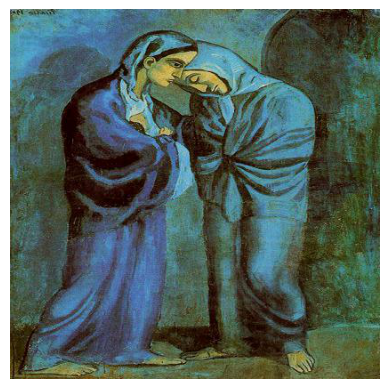

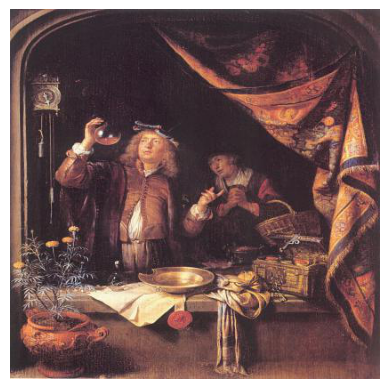

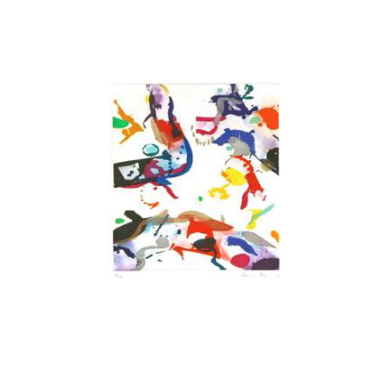

In [167]:
images, labels = next(iter(artist_train_dataloader))
print(imshow(images[0]));

images, labels = next(iter(style_train_dataloader))
print(imshow(images[0]));

images, labels = next(iter(genre_train_dataloader))
print(imshow(images[0]));

In [155]:
for data in artist_train_dataloader:
    print("------ARTIST-----")
    print(data[0])
    print(data[1])

    break
    
for data in style_train_dataloader:
    print("------STYLE-----")
    print(data[0])
    print(data[1])
    
    break
    
for data in genre_train_dataloader:
    print("------GENRE-----")
    print(data[0])
    print(data[1])
    
    break

------ARTIST-----
tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.000

In [168]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

resnet = resnet18(pretrained=True)
print(resnet)

cpu
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

In [158]:
# ARCHITECTURE :) 

class ConvRNNModel(nn.Module):
    def __init__(self, num_classes):
        super(ConvRNNModel, self).__init__()
        # Pre-trained ResNet 
        resnet = models.resnet18(pretrained=True)
        self.resnet_features = nn.Sequential(*list(resnet.children())[:-2])
        # LSTM
        self.rnn = nn.LSTM(512, hidden_size, num_layers, batch_first=True)  # ResNet18 output size is 512
        # Connected layer 
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
#         print(x.shape,"1")

        # Extract features using ResNet
        x = self.resnet_features(x)
        
#         print(x.shape,"2")

#         # Reshape output for recurrent layers
        batch_size, channels, height, width = x.size()
        
        x = x.view(batch_size, width * height, channels)  # Reshape for LSTM input
#         print(x.shape,"3")
#         x = x.permute(0, 2, 1)  # Permute dimensions for LSTM input

        _, (h_n, _) = self.rnn(x)
        print(x.shape,"4")
        
        # Final hidden state for classification
        x = self.fc(h_n[-1])
        return x

In [160]:
# Train loop

def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs):
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total

        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(valid_loader)
        val_accuracy = 100 * val_correct / val_total

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    print('Training finished')

In [161]:
# COMBINING EVERYTHING

In [162]:
num_artist_classes = 23
num_style_classes = 27
num_genre_classes = 10

# For conv. layer
in_channels = 3  # RGB
out_channels = 64  # No. of kernels
kernel_size = 3  # Size of kernel

# For recurr. layer
input_size = 64  # Input size to recurrent layer (output size of conv layer)
hidden_size = 128  # Hidden units
num_layers = 2  # No. of layers in the recurrent 
batch_size = 32  # Number of samples
sequence_length = 10  # Number of images for single sequence

artist_model = ConvRNNModel(num_artist_classes)
style_model = ConvRNNModel(num_style_classes)
genre_model = ConvRNNModel(num_genre_classes)

print("-------ARTIST-------", artist_model)
print("-------STYLE-------", style_model)
print("-------GENRE-------", genre_model)
# Looks same XD

-------ARTIST------- ConvRNNModel(
  (resnet_features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [163]:
# Might expriment with these 
artist_criterion = nn.CrossEntropyLoss()
style_criterion = nn.CrossEntropyLoss()
genre_criterion = nn.CrossEntropyLoss()

artist_optimizer = optim.Adam(artist_model.parameters(), lr=0.001)
style_optimizer = optim.Adam(style_model.parameters(), lr=0.001)
genre_optimizer = optim.Adam(genre_model.parameters(), lr=0.001)

num_epochs = 10

train_model(artist_model, artist_train_dataloader, artist_val_dataloader, artist_criterion, artist_optimizer, num_epochs)
train_model(style_model, style_train_dataloader, style_val_dataloader, style_criterion, style_optimizer, num_epochs)
train_model(genre_model, genre_train_dataloader, genre_val_dataloader, genre_criterion, genre_optimizer, num_epochs)

torch.Size([32, 3, 416, 416]) 1


KeyboardInterrupt: 

In [ ]:
# TESTING

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [ ]:
style_accuracy = evaluate_model(style_model, style_test_loader)
print(f'Style Model Accuracy: {style_accuracy:.2f}%')

artist_accuracy = evaluate_model(artist_model, artist_test_loader)
print(f'Artist Model Accuracy: {artist_accuracy:.2f}%')

genre_accuracy = evaluate_model(genre_model, genre_test_loader)
print(f'Genre Model Accuracy: {genre_accuracy:.2f}%')